In [1]:
import warnings
warnings.filterwarnings('ignore')

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할때보다 어렵다.
- Keras는 머신러닝 라이브러리 테마노(Theamo)와 Tensorflow를 Wrapping한 라이브러리

In [2]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
(train.head(), test.head(), train.count())

(   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
 0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 
    779  780  781  782  783  784  
 0    0    0    0    0    0    0  
 1    0    0    0    0    0    0  
 2    0    0    0    0    0    0  
 3    0    0    0    0    0    0  
 4    0    0    0    0    0    0  
 
 [5 rows x 785 columns],
    0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
 0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2    1    0    0    0    0    0

---
## Preprocessing (전처리)

In [3]:
# null
# 행이 너무 많으면 snm을 한번더해서 확인하기
train.isnull().sum().sum()

0

In [4]:
test.isnull().sum().sum()

0

In [5]:
train.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### train과 test를 Feature와 Target으로 분리하고 정규화하기

In [6]:
# train Feature와 Target으로 분리
train_label = train.loc[:, train.columns == 0]
train_data = train.loc[:, train.columns != 0]

# train data 정규화
train_data = train_data / 255



# test Feature와 Target으로 분리
test_label = test[0]
test_data = test.iloc[:,1:]

# test data 정규화
test_data = test_data / 255

print(train_label[0:5])
print(train_data[0:5])
print('*' * 20)
print(test_label[0:5])
print(test_data[0:5])

   0
0  5
1  0
2  4
3  1
4  9
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
********************
0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  

## Deep Learning Model 만들기

In [7]:
from tensorflow import keras

In [11]:
model = keras.Sequential()
# 히든, input_shape=(784,) -> 입력층
# 컬럼 갯수가 784 개
model.add(keras.layers.Dense(512, activation='softmax', input_shape=(784,)))
# 출력 ( 출력할 node갯수가 10종류)
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
from pickletools import optimize
from sklearn import metrics

model.compile(
    optimizer='adam', #optimize가 나오면 경사하강법이구나~
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# 데이터 훈련하기
import numpy as np

model.fit(
    np.array(train_data),
    np.array(train_label),
    epochs=50
)

Epoch 1/50
626/626 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.9125
Epoch 2/50
626/626 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.9183
Epoch 3/50
626/626 [==============================] - 1s 2ms/step - loss: 0.3063 - accuracy: 0.9234
Epoch 4/50
626/626 [==============================] - 1s 2ms/step - loss: 0.2918 - accuracy: 0.9276
Epoch 5/50
626/626 [==============================] - 1s 2ms/step - loss: 0.2787 - accuracy: 0.9314
Epoch 6/50
626/626 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9339
Epoch 7/50
626/626 [==============================] - 1s 2ms/step - loss: 0.2566 - accuracy: 0.9359
Epoch 8/50
626/626 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.9383
Epoch 9/50
626/626 [==============================] - 1s 2ms/step - loss: 0.2379 - accuracy: 0.9407
Epoch 10/50
626/626 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.9428

---
## 테스트 데이터로 평가하기

In [15]:
score = model.evaluate(test_data, test_label )
print('loss :', score[0])
print('accuracy :' , score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.9121
loss : 0.33143237233161926
accuracy : 0.9120879173278809


---
## test_data로 predict로 해보기

In [19]:
pred = model.predict(test_data)
print("test label :", test_label[:10])
# 지금은 인덱스값이 정답값임
print("pred :", np.argmax(pred[:10], axis=1))

32/32 [==============================] - 0s 956us/step
test label : 0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: int64
pred : [7 2 1 0 4 1 4 9 6 9]


In [20]:
# softmax기 때문에 첫번째 데이터가 10개 각각의 확률값이 나온다. 그중에 제일 높은수가 예측값으로 나오는거임
pred[:1]

# 이렇게 나오는걸 제일 높은 '인덱스값'을 뽑아서 보여주는 argmax를 사용
np.argmax(pred[:1], axis=1) # 를 사용.

array([7])

In [22]:
# 제일 큰수가 4인데 인덱스로 1번째에 있으니까. 1이 나옴
np.argmax(np.array([1,4,3,2]))

1

---
# 번외 : Image 만들기
- 데이터가 없을땐 이렇게 만들어줘

In [23]:
from PIL import Image

In [25]:
#0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:, train.columns != 0]
train1.shape

(20001, 784)

In [26]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28, 28)
abc.shape

(28, 28)

In [27]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [30]:
# image 저장하기
image.save("../Data/mnist_test3.jpg","JPEG")

---
# 이미지를 불러서 Predict해보기

In [31]:
# Image 불러오기
img = Image.open("../Data/mnist_test3.jpg")
img

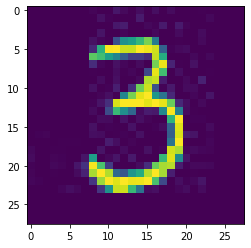

In [32]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [33]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray.shape

(28, 28)

In [34]:
# image를 1차원 배열로 변환
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [35]:
imgArray3 = imgArray2.tolist() # numpy 배열이 python 배열로 됨

In [38]:
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> 아까 공부를 이렇게 시켜서 형태를 맞춰준거야

In [40]:
model.predict(dfArray)

1/1 [==============================] - 0s 9ms/step


array([[1.2977621e-06, 4.1837618e-04, 6.6466490e-04, 9.9580634e-01,
        3.8934053e-05, 5.3033873e-04, 2.9601888e-06, 4.1582840e-04,
        1.6712048e-03, 4.5000721e-04]], dtype=float32)

In [39]:
print("예측값 :",np.argmax(model.predict(dfArray), axis=1))

1/1 [==============================] - 0s 9ms/step
예측값 : [3]
